In [1]:
# Import des librairies nécessaires
import pandas as pd
import scipy.stats as st
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
path = 'cleaned/'
filename = 'dataset_cleaned.csv'

In [3]:
df = pd.read_csv(path+filename)

In [4]:
df.head()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFATotal,TotalGHGEmissions,SiteEnergyUse(kBtu)
0,1927.0,1.0,2.720407,88434.000000,88434.000000,249.98,7.226362e+06
1,1996.0,1.0,2.720407,88502.000000,103566.000000,295.86,8.387933e+06
2,1969.0,1.0,2.720407,55045.339734,58763.760722,41.96,3.618398e+06
3,1926.0,1.0,2.720407,61320.000000,61320.000000,286.43,6.794584e+06
4,1980.0,1.0,2.720407,113580.000000,175580.000000,41.96,1.417261e+07


### Analyse exploratoire

In [5]:
df.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFATotal,TotalGHGEmissions,SiteEnergyUse(kBtu)
count,1513.000000,1513.0,1513.000000,1513.000000,1513.000000,1513.000000,1.513000e+03
mean,1961.532056,1.0,2.720407,55045.339734,58763.760722,66.734329,3.618398e+06
std,32.825806,0.0,1.698770,36387.865870,40712.242877,69.455474,3.323837e+06
min,1900.000000,1.0,0.000000,3636.000000,11285.000000,-0.800000,5.713320e+04
25%,1930.000000,1.0,1.000000,27800.000000,28800.000000,20.100000,1.234096e+06
50%,1965.000000,1.0,2.000000,45680.000000,47699.000000,41.960000,2.669564e+06
75%,1988.000000,1.0,3.000000,63888.000000,66842.000000,85.010000,4.448582e+06
max,2015.000000,1.0,8.000000,192259.000000,213834.000000,318.970000,1.572558e+07


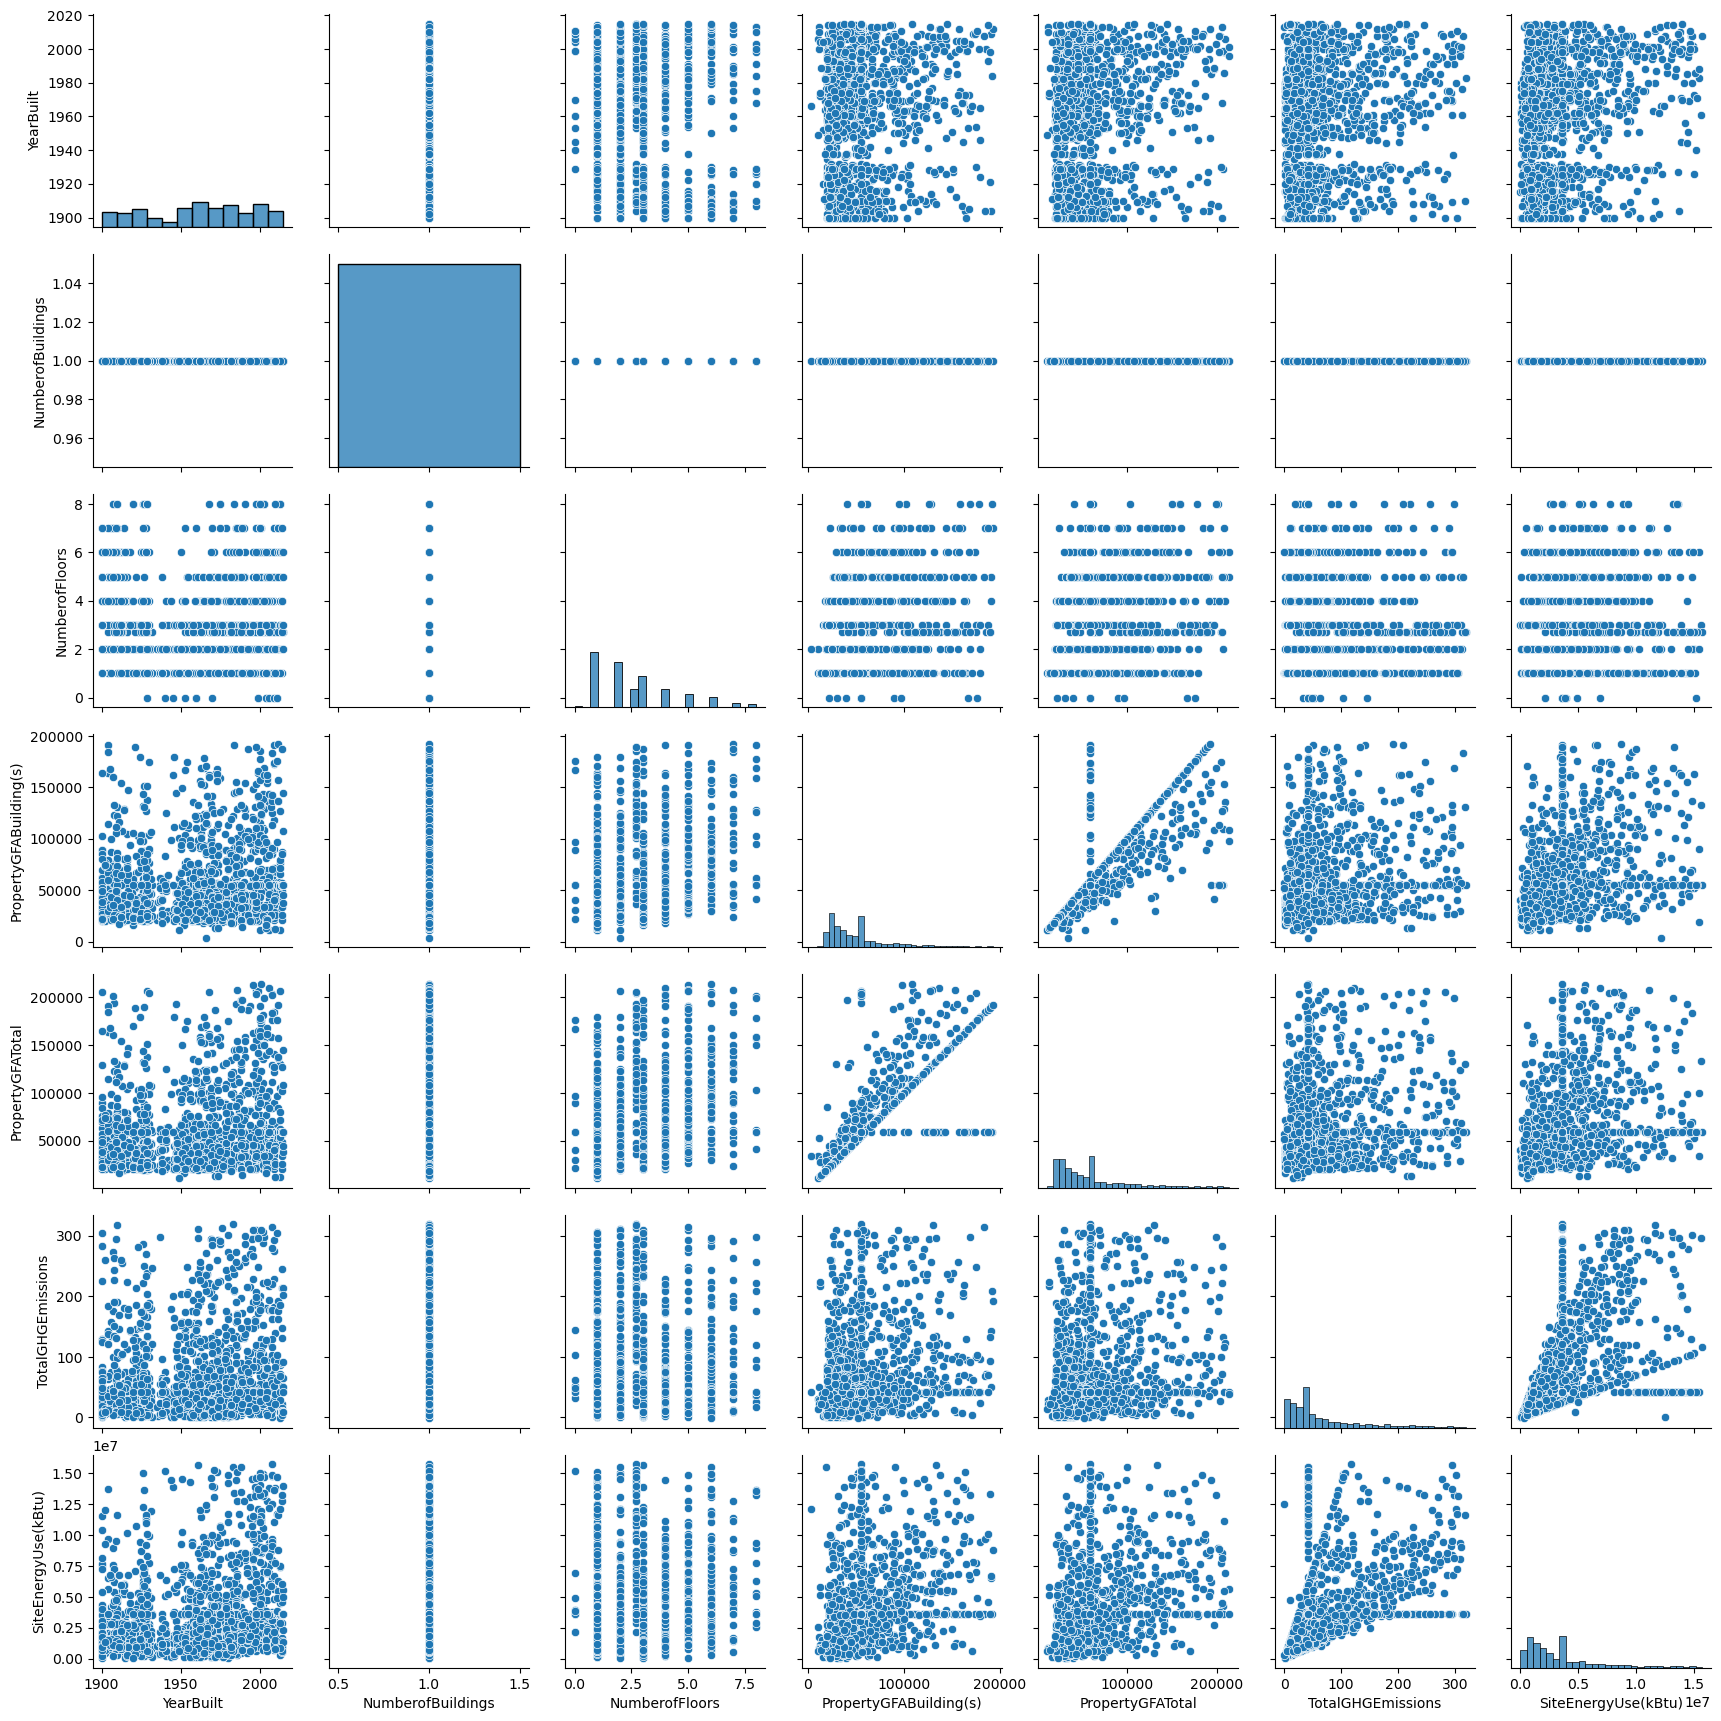

In [6]:
# Scatter plot des variables quantitatives
sns.pairplot(df)

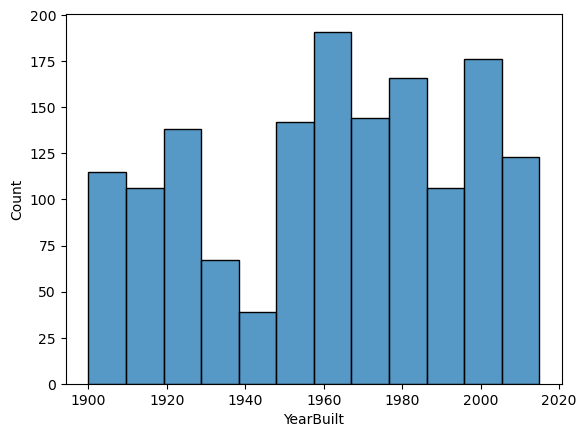

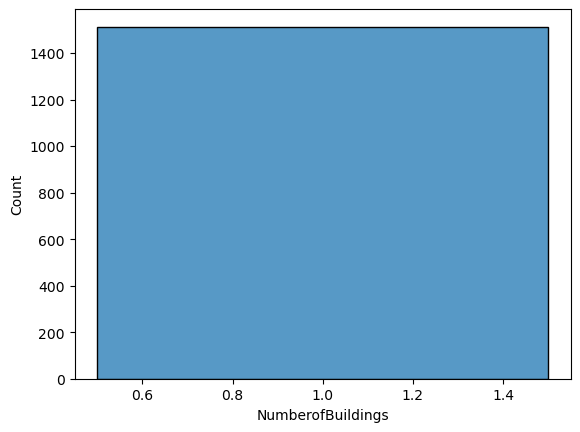

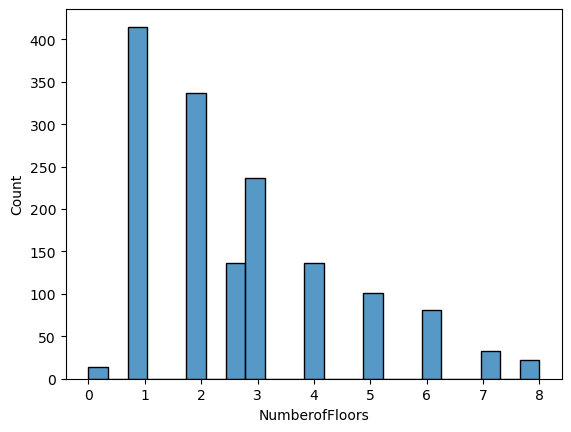

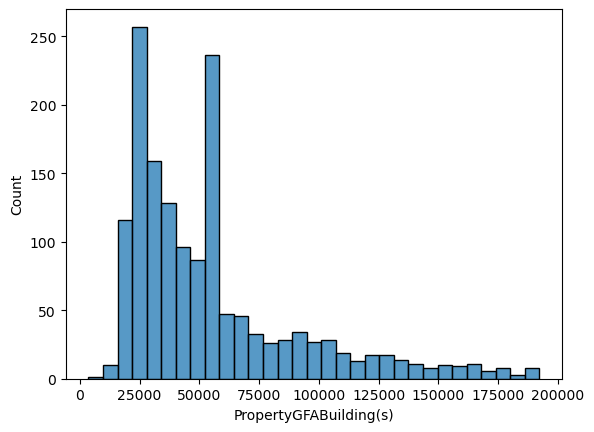

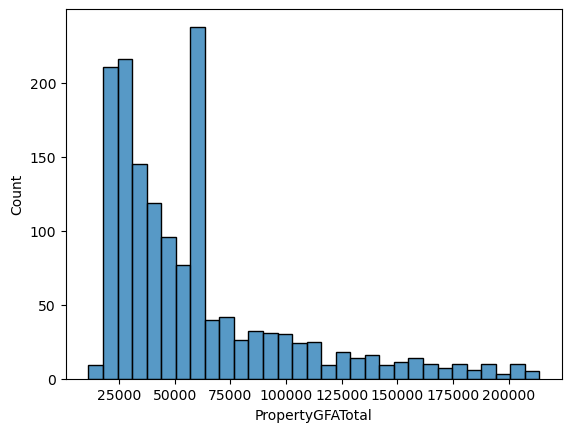

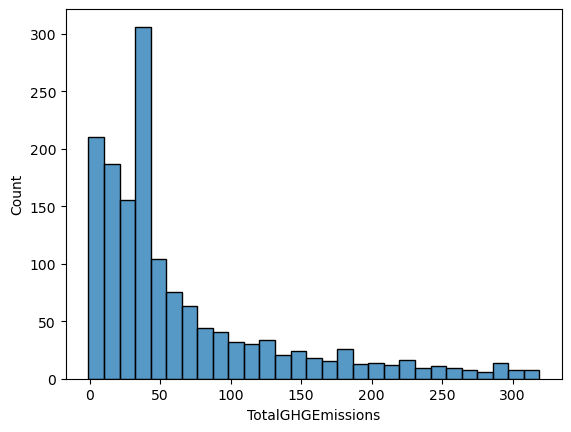

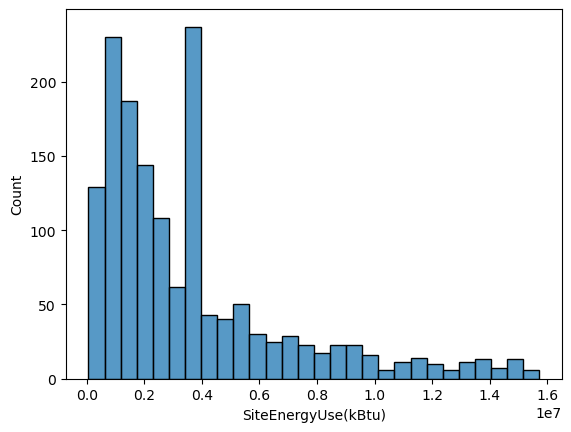

In [7]:
# Histogramme pour observer la distribution de nos variables 
for elem in df.columns :
    sns.histplot(x=df[elem])
    plt.show()

In [8]:
# Test de normalité des données 
for elem in df.columns :
    test = st.shapiro(df[elem])
    print('La pvalue de', elem, 'est',test.pvalue)

2023-03-15 12:16:22,238 [20720] WARNING  py.warnings:109: [JupyterRequire] C:\Users\aguer\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "



La pvalue de YearBuilt est 2.125553776028573e-22
La pvalue de NumberofBuildings est 1.0
La pvalue de NumberofFloors est 1.4569269471291379e-32
La pvalue de PropertyGFABuilding(s) est 1.7379337396560936e-37
La pvalue de PropertyGFATotal est 9.495786939619977e-39
La pvalue de TotalGHGEmissions est 1.4352659391000506e-40
La pvalue de SiteEnergyUse(kBtu) est 2.826363230864276e-38


On observe donc que aucune de nos valeurs ne suit la loi normale, le nombre de batiment ne possèdant que des valeurs 1.

### ACP

In [9]:
# Matrice des données
X = df.values
X.shape

(1513, 7)

In [10]:
# mettre colonnes dans une varibale features
features = df.columns
features

Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFABuilding(s)', 'PropertyGFATotal', 'TotalGHGEmissions',
       'SiteEnergyUse(kBtu)'],
      dtype='object')

In [11]:
# Instanciation
scaler = StandardScaler()

In [12]:
# On fit et on transforme 
X_scaled = scaler.fit_transform(X)

In [17]:
# On travaille sur les 8 premières composantes
n_components = 6

In [18]:
# Instanciation
pca = PCA(n_components=n_components)

In [19]:
# On entraine
pca.fit(X_scaled)

PCA(n_components=6)

In [20]:
# On observe les variances captées par chaque composante
pca.explained_variance_ratio_

array([0.4419188 , 0.18187714, 0.15618012, 0.12321684, 0.07104433,
       0.02576277])

In [21]:
# On exprime dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([44.19, 18.19, 15.62, 12.32,  7.1 ,  2.58])

In [22]:
# Somme cumulée croissante de la variance expliquée
scree_cum = scree.cumsum().round()
scree_cum

array([ 44.,  62.,  78.,  90.,  97., 100.])

In [23]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

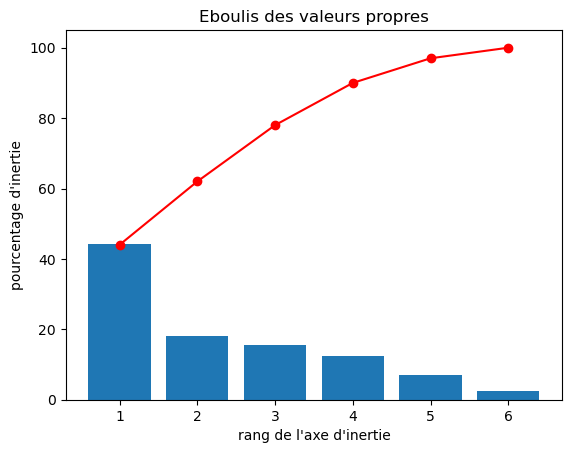

In [24]:
# Affichage de l'éboulis des valeurs propres qui nous montre comment chaque composante explique la variance
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On observe qu'on a besoin de 4 composantes pour exprimer 85% de la variance donc que l'ACP n'est pas forcement adapté dans le traitement de notre jeu de données. 